# Project 3
## Xiaonan Hu & Liqi Zhu

## 1. Packages and Webdriver

In [2]:
from selenium import webdriver
import time
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import *
import pandas as pd
import numpy as np
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
driver=webdriver.Chrome('C:/Users/Kiran/AppData/Local/Continuum/Anaconda3/lib/site-packages/selenium/webdriver/chrome/chromedriver.exe')
#driver.get("http://www.quora.com")

In [3]:
cookie=driver.get_cookies()
time.sleep(3)
driver.get('https://www.quora.com/search?q=anymore')
time.sleep(5)

## 2. Scraping

In [7]:
# Scroll
def execute_times(times):
    for i in range(times + 1):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(5)
execute_times(1000)

KeyboardInterrupt: 

In [8]:
# Questions with 'anymore' in result page
html=driver.page_source
soup1=BeautifulSoup(html,'lxml')
ques = soup1.select('span.rendered_qtext')
#print(ans)
qtexts = []
for q in ques:
    text = q.get_text()
    if 'anymore' in text:
        #print(text)
        qtexts.append(text) #texts.append(text.encode('ascii', 'ignore'))
print(len(qtexts),qtexts)

4735 ["Why don't guys pursue women anymore?", 'When did you find out that you were not young anymore?', "My son told me he doesn't want to go to church anymore. How can I punish him?", "My wife just had twins 3 weeks ago. I feel like I can't handle the stress anymore. How can I leave them and start a new life?", "Should I drop out if I feel like I can't survive at IIT anymore?", 'I never read books anymore. Do you still read books?', "What could you do as a kid that kids can't do anymore?", 'Is Indian media not credible anymore?', "I sent my 12 year old son to school in a dress to combat gender stereotypes, and now he doesn't want to go to school anymore. What should I do?", 'How do I tell my wife that I don\'t love her anymore? We are not going through a difficult time, everything is "perfect".', "I don't want to live anymore. I don't eat anymore, I don't sleep anymore, and I'm shaking. I don't want to hurt anyone. I just need a reason to live. Can you please give me a reason to live?

In [9]:
# Answers with 'anymore' in result page
html=driver.page_source
soup1=BeautifulSoup(html,'lxml')
ans = soup1.select('p.qtext_para')
#print(ans)
atexts = []
for a in ans:
    text = a.get_text()
    if 'anymore' in text:
        #print(text)
        atexts.append(text) #texts.append(text.encode('ascii', 'ignore'))
print(len(atexts),atexts)

210 ['Here’s one of the MOST common mistakes people make with food and why they don’t ever feel hungry anymore.', 'If your parter didn’t love you anymore, sometimes you can easily tell. You’ll find :', 'You know you’re not a beginner anymore if at least 10 of the following are true:', "What are signs you don't love a person anymore?", 'Why are you concerned about not feeling joy anymore? I understand you’re alarmed, and it would be awkward if you were not. I was alarmed just like you. But, why are you REA...', '.Unfortunately, Netflix has started blocking the bypassing tools like VPNs on its network. This is the reason you can’t watch Netflix US outside the US anymore. But that do...', 'Most likely because you do not do anything exciting anymore!', "“Why don't people listen to rock music anymore?”", '“We did not see you anymore” would be said to somebody who has most likely permanently left and will never again be seen by the speaker. It would usually be followed with a...', '?Me, be t

In [10]:
# hrefs of answers with 'anymore'
ans = soup1.find_all('a', target="_blank")
hrefs = []
for a in ans:
    href = a.get('href')
    if '#ans' in href:
        hrefs.append(href)
print(len(hrefs),hrefs)

4398 ['/Why-dont-guys-pursue-women-anymore#ans49211703', '/When-did-you-find-out-that-you-were-not-young-anymore#ans29609776', '/My-son-told-me-he-doesnt-want-to-go-to-church-anymore-How-can-I-punish-him#ans59727914', '/My-wife-just-had-twins-3-weeks-ago-I-feel-like-I-cant-handle-the-stress-anymore-How-can-I-leave-them-and-start-a-new-life#ans14070332', '/Should-I-drop-out-if-I-feel-like-I-cant-survive-at-IIT-anymore#ans6546115', '/I-never-read-books-anymore-Do-you-still-read-books#ans3995230', '/What-could-you-do-as-a-kid-that-kids-cant-do-anymore#ans5751244', '/Is-Indian-media-not-credible-anymore#ans48191700', '/I-sent-my-12-year-old-son-to-school-in-a-dress-to-combat-gender-stereotypes-and-now-he-doesnt-want-to-go-to-school-anymore-What-should-I-do#ans64853371', '/How-do-I-tell-my-wife-that-I-dont-love-her-anymore-We-are-not-going-through-a-difficult-time-everything-is-perfect#ans42600669', '/I-dont-want-to-live-anymore-I-dont-eat-anymore-I-dont-sleep-anymore-and-Im-shaking-I-dont-

In [11]:
# urls of answers
ans_urls=[]
for href in hrefs:
    ans_urls.append('https://www.quora.com'+ href)
print(len(ans_urls), ans_urls)

4398 ['https://www.quora.com/Why-dont-guys-pursue-women-anymore#ans49211703', 'https://www.quora.com/When-did-you-find-out-that-you-were-not-young-anymore#ans29609776', 'https://www.quora.com/My-son-told-me-he-doesnt-want-to-go-to-church-anymore-How-can-I-punish-him#ans59727914', 'https://www.quora.com/My-wife-just-had-twins-3-weeks-ago-I-feel-like-I-cant-handle-the-stress-anymore-How-can-I-leave-them-and-start-a-new-life#ans14070332', 'https://www.quora.com/Should-I-drop-out-if-I-feel-like-I-cant-survive-at-IIT-anymore#ans6546115', 'https://www.quora.com/I-never-read-books-anymore-Do-you-still-read-books#ans3995230', 'https://www.quora.com/What-could-you-do-as-a-kid-that-kids-cant-do-anymore#ans5751244', 'https://www.quora.com/Is-Indian-media-not-credible-anymore#ans48191700', 'https://www.quora.com/I-sent-my-12-year-old-son-to-school-in-a-dress-to-combat-gender-stereotypes-and-now-he-doesnt-want-to-go-to-school-anymore-What-should-I-do#ans64853371', 'https://www.quora.com/How-do-I-te

## 3. Saving

In [18]:
# Saving list to .txt file
fileObject = open('qtexts.txt', 'w', encoding='ascii', errors='ignore')
for text in qtexts: 
    #print(text,file = fileObject)
    fileObject.write(text)  
    fileObject.write('\n')  
fileObject.close()  

In [21]:
# Saving list to .txt file
fileObject = open('atexts.txt', 'w', encoding='ascii', errors='ignore')
for text in atexts: 
    #print(text,file = fileObject)
    fileObject.write(text)  
    fileObject.write('\n')  
fileObject.close()  

In [19]:
# Saving list to .txt file
fileObject = open('hrefs2.txt', 'w', encoding='ascii', errors='ignore')
for href in hrefs: 
    fileObject.write(href)  
    fileObject.write('\n')  
fileObject.close()  

In [20]:
# Saving list to .txt file
fileObject = open('ans_urls2.txt', 'w', encoding='ascii', errors='ignore')
for url in ans_urls: 
    fileObject.write(url)  
    fileObject.write('\n')  
fileObject.close()  

## 4. Data - Answers

In [12]:
paras = []
for url in ans_urls:
    res = requests.get(url,headers = {'User-Agent': 'My-requests-agent/0.1'})
    if res.status_code == 200:
        soup = BeautifulSoup(res.content,'lxml') 
        answer = soup.select('p.ui_qtext_para')
        for p in answer:
            p = p.get_text()
            if 'anymore' in p:
                paras.append(p)
    else:
        print(res.status_code,url)
        continue
print(len(paras),paras)

2115 ["So, if “why don't guys pursue women anymore?” isn't the right question, then what is the right question?", "I might revise this question to ask “why don't guys with genuine interest in a woman as a person pursue women anymore?”. That's something that seems to happen a lot less, and I think for a very good reason.", "So… yeah. Guys still do pursue women. But nowadays, it's primarily for superficial reasons. It's hard to come across as being genuine, so guys who are actually interested in women as people have just given up. That is why it would appear that guys don't pursue women anymore.", 'So, why do we not pursue you anymore? Because we don\'t have to. Because now, there are tools that make dating a tiny bit more equitable. Because now, when I see you walking around the grocery store, instead of agonizing over what I\'m going to say to you, or if that look you gave me meant anything, I say, "Fuck it. I\'ll get on Tinder tonight and snag a date for tomorrow."', 'We don’t pursue 

In [172]:
# Saving as .txt file
fileObject = open('Paras2.txt', 'w', encoding='ascii', errors='ignore')
for p in paras: 
    fileObject.write(p)  
    #fileObject.write('\n')  
fileObject.close()  

In [26]:
sents = []
for para in paras:
    sent=sent_tokenize(para)
    for s in sent:
        if 'anymore' in s:
            sents.append(s)
print(len(sents),(sents))

2214 ["So, if why don't guys pursue women anymore?", "I might revise this question to ask why don't guys with genuine interest in a woman as a person pursue women anymore?.", "That is why it would appear that guys don't pursue women anymore.", 'So, why do we not pursue you anymore?', 'We dont pursue women anymore coz its really not worth it.', 'Not sneaking anymore to the museum, we would spend after-school Fridays drinking beer in a park, worrying about final exams.', 'When you hear more proper terms of address, you know you have crossed over some invisible line and youre not a child anymore.', 'When did you find out that you were not young anymore?', "The question was: My son told me he doesn't want to go to church anymore.", 'It took another year before I got up the courage to tell my mom that I didnt believe in her religion and I wasnt going to church anymore.', 'Is Indian Media not credible anymore ?', 'I couldnt take it anymore.', "I don't know what to say anymore.", 'You began t

In [34]:
# Saving as .txt file
fileObject = open('Sents2.txt', 'w', encoding='ascii', errors='ignore')
for s in sents: 
    fileObject.write(s.lower())  
    fileObject.write('\n')  
fileObject.close()  

## 5. Data - Question

In [28]:
qsents = []
for q in qtexts:
    sent= sent_tokenize(q)
    for s in sent:
        if 'anymore' in s:
            qsents.append(s)
print(len(qsents),(qsents))

4778 ["Why don't guys pursue women anymore?", 'When did you find out that you were not young anymore?', "My son told me he doesn't want to go to church anymore.", "I feel like I can't handle the stress anymore.", "Should I drop out if I feel like I can't survive at IIT anymore?", 'I never read books anymore.', "What could you do as a kid that kids can't do anymore?", 'Is Indian media not credible anymore?', "I sent my 12 year old son to school in a dress to combat gender stereotypes, and now he doesn't want to go to school anymore.", "How do I tell my wife that I don't love her anymore?", "I don't want to live anymore.", "I don't eat anymore, I don't sleep anymore, and I'm shaking.", 'Why am I not as hungry anymore?', 'Heres one of the MOST common mistakes people make with food and why they dont ever feel hungry anymore.If I were a betting man Im willing to bet you went on a diet as so...', "What are the signs your partner doesn't love you anymore?", 'If your parter didnt love you anym

In [29]:
# Saving as .txt file
fileObject = open('QSents2.txt', 'w', encoding='ascii', errors='ignore')
for s in qsents: 
    fileObject.write(s.lower())  
    fileObject.write('\n')  
fileObject.close()  

## 6. Reloading

In [6]:
# Reloading .txt file
with open('hrefs2.txt', 'r') as f:  
    hrefs = f.readlines()
print(len(hrefs),hrefs)

4398 ['/Why-dont-guys-pursue-women-anymore#ans49211703\n', '/When-did-you-find-out-that-you-were-not-young-anymore#ans29609776\n', '/My-son-told-me-he-doesnt-want-to-go-to-church-anymore-How-can-I-punish-him#ans59727914\n', '/My-wife-just-had-twins-3-weeks-ago-I-feel-like-I-cant-handle-the-stress-anymore-How-can-I-leave-them-and-start-a-new-life#ans14070332\n', '/Should-I-drop-out-if-I-feel-like-I-cant-survive-at-IIT-anymore#ans6546115\n', '/I-never-read-books-anymore-Do-you-still-read-books#ans3995230\n', '/What-could-you-do-as-a-kid-that-kids-cant-do-anymore#ans5751244\n', '/Is-Indian-media-not-credible-anymore#ans48191700\n', '/I-sent-my-12-year-old-son-to-school-in-a-dress-to-combat-gender-stereotypes-and-now-he-doesnt-want-to-go-to-school-anymore-What-should-I-do#ans64853371\n', '/How-do-I-tell-my-wife-that-I-dont-love-her-anymore-We-are-not-going-through-a-difficult-time-everything-is-perfect#ans42600669\n', '/I-dont-want-to-live-anymore-I-dont-eat-anymore-I-dont-sleep-anymore-an

In [8]:
# Reloading .txt file
with open('ans_urls2.txt', 'r') as f:  
    ans_urls = f.readlines()
print(len(ans_urls),ans_urls)

4398 ['https://www.quora.com/Why-dont-guys-pursue-women-anymore#ans49211703\n', 'https://www.quora.com/When-did-you-find-out-that-you-were-not-young-anymore#ans29609776\n', 'https://www.quora.com/My-son-told-me-he-doesnt-want-to-go-to-church-anymore-How-can-I-punish-him#ans59727914\n', 'https://www.quora.com/My-wife-just-had-twins-3-weeks-ago-I-feel-like-I-cant-handle-the-stress-anymore-How-can-I-leave-them-and-start-a-new-life#ans14070332\n', 'https://www.quora.com/Should-I-drop-out-if-I-feel-like-I-cant-survive-at-IIT-anymore#ans6546115\n', 'https://www.quora.com/I-never-read-books-anymore-Do-you-still-read-books#ans3995230\n', 'https://www.quora.com/What-could-you-do-as-a-kid-that-kids-cant-do-anymore#ans5751244\n', 'https://www.quora.com/Is-Indian-media-not-credible-anymore#ans48191700\n', 'https://www.quora.com/I-sent-my-12-year-old-son-to-school-in-a-dress-to-combat-gender-stereotypes-and-now-he-doesnt-want-to-go-to-school-anymore-What-should-I-do#ans64853371\n', 'https://www.quo

In [3]:
# Reloading .txt file
with open('QSents2.txt', 'r') as f:  
    qsents = f.readlines()
print(len(qsents), qsents)

4778 ["why don't guys pursue women anymore?\n", 'when did you find out that you were not young anymore?\n', "my son told me he doesn't want to go to church anymore.\n", "i feel like i can't handle the stress anymore.\n", "should i drop out if i feel like i can't survive at iit anymore?\n", 'i never read books anymore.\n', "what could you do as a kid that kids can't do anymore?\n", 'is indian media not credible anymore?\n', "i sent my 12 year old son to school in a dress to combat gender stereotypes, and now he doesn't want to go to school anymore.\n", "how do i tell my wife that i don't love her anymore?\n", "i don't want to live anymore.\n", "i don't eat anymore, i don't sleep anymore, and i'm shaking.\n", 'why am i not as hungry anymore?\n', 'heres one of the most common mistakes people make with food and why they dont ever feel hungry anymore.if i were a betting man im willing to bet you went on a diet as so...\n', "what are the signs your partner doesn't love you anymore?\n", 'if y

In [4]:
# Reloading .txt file
with open('Sents2.txt', 'r') as f:  
    asents = f.readlines()
print(len(asents),asents)

2214 ["so, if why don't guys pursue women anymore?\n", "i might revise this question to ask why don't guys with genuine interest in a woman as a person pursue women anymore?.\n", "that is why it would appear that guys don't pursue women anymore.\n", 'so, why do we not pursue you anymore?\n', 'we dont pursue women anymore coz its really not worth it.\n', 'not sneaking anymore to the museum, we would spend after-school fridays drinking beer in a park, worrying about final exams.\n', 'when you hear more proper terms of address, you know you have crossed over some invisible line and youre not a child anymore.\n', 'when did you find out that you were not young anymore?\n', "the question was: my son told me he doesn't want to go to church anymore.\n", 'it took another year before i got up the courage to tell my mom that i didnt believe in her religion and i wasnt going to church anymore.\n', 'is indian media not credible anymore ?\n', 'i couldnt take it anymore.\n', "i don't know what to say

## 7. Analysis

In [5]:
pd.set_option('max_colwidth',500)

In [6]:
# Define Data Frame
df = pd.DataFrame({'Sentence': qsents+asents})
df

Sentence
0                                                                                                                                                                                                                                                                  why don't guys pursue women anymore?\n
1                                                                                                                                                                                                                                                when did you find out that you were not young anymore?\n
2                                                                                                                                                                                                                                               my son told me he doesn't want to go to church anymore.\n
3                                                                                                                                                                                                                                                        i feel like i can't handle the stress anymore.\n
4                                                                                                                                                                                                                                      should i drop out if i feel like i can't survive at iit anymore?\n
5                                                                                                                                                                                                                                                                           i never read books anymore.\n
6                                                                                                                                                                                                                                                what could you do as a kid that kids can't do anymore?\n
7                                                                                                                                                                                                                                                                 is indian media not credible anymore?\n
8                                                                                                                                                                         i sent my 12 year old son to school in a dress to combat gender stereotypes, and now he doesn't want to go to school anymore.\n
9                                                                                                                                                                                                                                                  how do i tell my wife that i don't love her anymore?\n
10                                                                                                                                                                                                                                                                        i don't want to live anymore.\n
11                                                                                                                                                                                                                                         i don't eat anymore, i don't sleep anymore, and i'm shaking.\n
12                                                                                                                                                                                                                                                                      why am i not as hungry anymore?\n
13                                                                                                                   

In [7]:
data = pd.DataFrame(df.drop_duplicates(['Sentence']))
data

Sentence
0                                                                                                                                                                                                                                                                  why don't guys pursue women anymore?\n
1                                                                                                                                                                                                                                                when did you find out that you were not young anymore?\n
2                                                                                                                                                                                                                                               my son told me he doesn't want to go to church anymore.\n
3                                                                                                                                                                                                                                                        i feel like i can't handle the stress anymore.\n
4                                                                                                                                                                                                                                      should i drop out if i feel like i can't survive at iit anymore?\n
5                                                                                                                                                                                                                                                                           i never read books anymore.\n
6                                                                                                                                                                                                                                                what could you do as a kid that kids can't do anymore?\n
7                                                                                                                                                                                                                                                                 is indian media not credible anymore?\n
8                                                                                                                                                                         i sent my 12 year old son to school in a dress to combat gender stereotypes, and now he doesn't want to go to school anymore.\n
9                                                                                                                                                                                                                                                  how do i tell my wife that i don't love her anymore?\n
10                                                                                                                                                                                                                                                                        i don't want to live anymore.\n
11                                                                                                                                                                                                                                         i don't eat anymore, i don't sleep anymore, and i'm shaking.\n
12                                                                                                                                                                                                                                                                      why am i not as hungry anymore?\n
13                                                                                                                   

In [8]:
data['Polarity'] = data.apply(lambda x: TextBlob(x[0]).sentences[0].sentiment.polarity, axis=1)
data['Subjectivity'] = df.apply(lambda x: TextBlob(x[0]).sentences[0].sentiment.subjectivity, axis=1)
data

Sentence  \
0                                                                                                                                                                                                                                                                  why don't guys pursue women anymore?\n   
1                                                                                                                                                                                                                                                when did you find out that you were not young anymore?\n   
2                                                                                                                                                                                                                                               my son told me he doesn't want to go to church anymore.\n   
3                                                                                                                                                                                                                                                        i feel like i can't handle the stress anymore.\n   
4                                                                                                                                                                                                                                      should i drop out if i feel like i can't survive at iit anymore?\n   
5                                                                                                                                                                                                                                                                           i never read books anymore.\n   
6                                                                                                                                                                                                                                                what could you do as a kid that kids can't do anymore?\n   
7                                                                                                                                                                                                                                                                 is indian media not credible anymore?\n   
8                                                                                                                                                                         i sent my 12 year old son to school in a dress to combat gender stereotypes, and now he doesn't want to go to school anymore.\n   
9                                                                                                                                                                                                                                                  how do i tell my wife that i don't love her anymore?\n   
10                                                                                                                                                                                                                                                                        i don't want to live anymore.\n   
11                                                                                                                                                                                                                                         i don't eat anymore, i don't sleep anymore, and i'm shaking.\n   
12                                                                                                                                                                                                                                                                      why am i not as hungry anymore?\n   
13                                                                         

In [9]:
sid = SentimentIntensityAnalyzer()
data['Polarity_Co'] = data.apply(lambda x: sid.polarity_scores(x[0])['compound'], axis=1)
data
#positive sentiment: compound score >= 0.05
#neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
#negative sentiment: compound score <= -0.05

Sentence  \
0                                                                                                                                                                                                                                                                  why don't guys pursue women anymore?\n   
1                                                                                                                                                                                                                                                when did you find out that you were not young anymore?\n   
2                                                                                                                                                                                                                                               my son told me he doesn't want to go to church anymore.\n   
3                                                                                                                                                                                                                                                        i feel like i can't handle the stress anymore.\n   
4                                                                                                                                                                                                                                      should i drop out if i feel like i can't survive at iit anymore?\n   
5                                                                                                                                                                                                                                                                           i never read books anymore.\n   
6                                                                                                                                                                                                                                                what could you do as a kid that kids can't do anymore?\n   
7                                                                                                                                                                                                                                                                 is indian media not credible anymore?\n   
8                                                                                                                                                                         i sent my 12 year old son to school in a dress to combat gender stereotypes, and now he doesn't want to go to school anymore.\n   
9                                                                                                                                                                                                                                                  how do i tell my wife that i don't love her anymore?\n   
10                                                                                                                                                                                                                                                                        i don't want to live anymore.\n   
11                                                                                                                                                                                                                                         i don't eat anymore, i don't sleep anymore, and i'm shaking.\n   
12                                                                                                                                                                                                                                                                      why am i not as hungry anymore?\n   
13                                                                         

In [11]:
b = df.Sentence
data['isQuestion']=b.str.contains("\?")
data['isNegativeAnymore']=(b.str.contains("before|prefer|without|surprised|lost|ion|than|rather|less|most|not|no|not|n\'t|nt|idk|idc|idek|idec|idfk|idfc|relactant.*|deny|reject.*|refuse.*|decline.*|repulse.*|impossible|doubt|suspect.*|suspicious|hard|never|rarely|none|no|every|only|barely|scarcely|few|little|only|all|zero|0|if|whether|whatever|whenever|wherever|unless|lest|whoever|than|rather|less|most|except|prevent.*|unlikely|improbable|dislike.*")|b.str.contains("keep&from")|b.str.contains("kept&from")|b.str.contains("too&to")|b.str.contains("est&any")|b.str.contains("est&ever")|b.str.contains("without|except")|b.str.contains("all&but"))
data['OvertNegatives']= b.str.contains("ion|not|no|not|n\'t|nt|idk|idc|idek|idec|idfk|idfc")
data['IncorporatedNegatives']=b.str.contains("lost|prevent.*|unlikely|improbable|dislike.*|relactant|deny|reject.*|refuse.*|decline.*|repulse.*|impossible|doubt|suspect.*|suspicious")
data['NegativeFrequencyAdverbs']=b.str.contains("hard|never|rarely|none|no|every|only|barely|scarcely")
data['Quantifiers&QuantifiedAdverbs']=b.str.contains("few|little|only|all|zero|0")
data['HypotheticalClauses']=b.str.contains("if|whether|whatever|whenever|wherever|unless|lest|whoever")
data['Comparatives,Superlatives,etc.']=(b.str.contains('before|prefer|without|surprised|than|rather|more|less|most')|b.str.contains("est&any")|b.str.contains("est&ever"))
data["*Predicationsof'excess'withToo"]= b.str.contains("too&to")     
data["*NegativePrepositions"]=(b.str.contains("without|except")|b.str.contains("all&but"))
data['EvenUse']=b.str.contains("even")
data['EveryUse']=b.str.contains("every")
data['ModalVerb']=b.str.contains("shall|should|would|must|can|could|might|will|won\'t|wont|might")
data['EverUse']=b.str.contains("ever")

In [12]:
data

Sentence  \
0                                                                                                                                                                                                                                                                  why don't guys pursue women anymore?\n   
1                                                                                                                                                                                                                                                when did you find out that you were not young anymore?\n   
2                                                                                                                                                                                                                                               my son told me he doesn't want to go to church anymore.\n   
3                                                                                                                                                                                                                                                        i feel like i can't handle the stress anymore.\n   
4                                                                                                                                                                                                                                      should i drop out if i feel like i can't survive at iit anymore?\n   
5                                                                                                                                                                                                                                                                           i never read books anymore.\n   
6                                                                                                                                                                                                                                                what could you do as a kid that kids can't do anymore?\n   
7                                                                                                                                                                                                                                                                 is indian media not credible anymore?\n   
8                                                                                                                                                                         i sent my 12 year old son to school in a dress to combat gender stereotypes, and now he doesn't want to go to school anymore.\n   
9                                                                                                                                                                                                                                                  how do i tell my wife that i don't love her anymore?\n   
10                                                                                                                                                                                                                                                                        i don't want to live anymore.\n   
11                                                                                                                                                                                                                                         i don't eat anymore, i don't sleep anymore, and i'm shaking.\n   
12                                                                                                                                                                                                                                                                      why am i not as hungry anymore?\n   
13                                                                         

## 8. Plots & t-tests

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

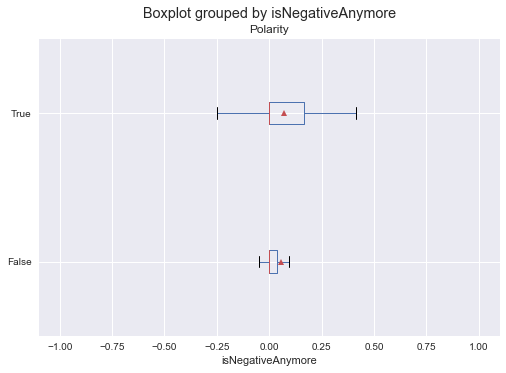

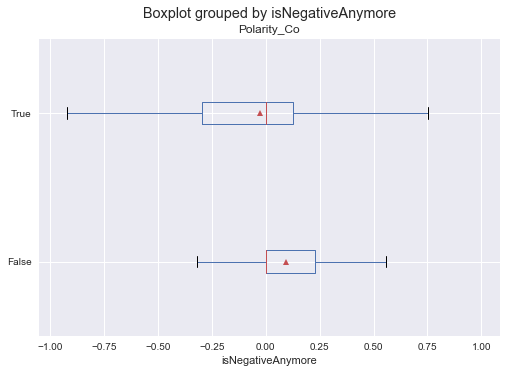

In [14]:
plt.figure()
data.boxplot('Polarity',by='isNegativeAnymore', vert=False, showmeans=True)
data.boxplot('Polarity_Co',by='isNegativeAnymore', vert=False, showmeans=True)
plt.show()

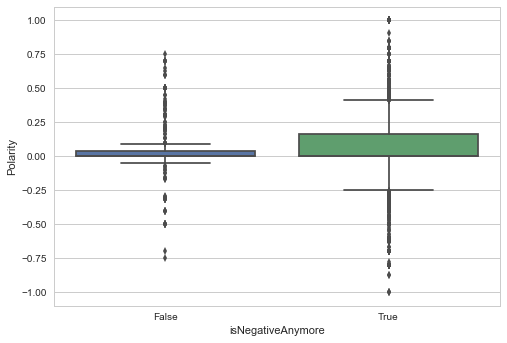

In [15]:
sns.set_style("whitegrid")
sns.boxplot(x="isNegativeAnymore", y="Polarity", data=data)
#sns.swarmplot(x="Polarity", y="isNegativeAnymore", data=data, color=".25")
plt.show()

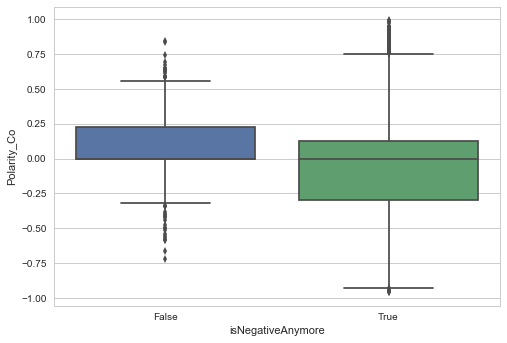

In [16]:
sns.boxplot(x="isNegativeAnymore", y="Polarity_Co", data=data)
plt.show()

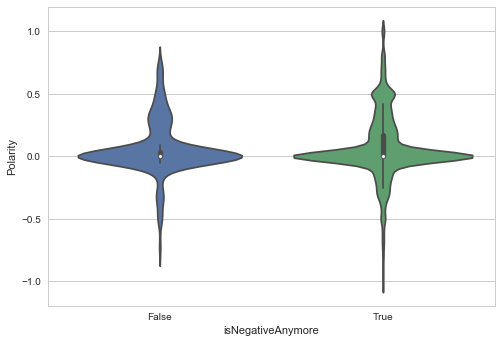

In [17]:
sns.violinplot(x="isNegativeAnymore", y="Polarity", data=data)
plt.show()

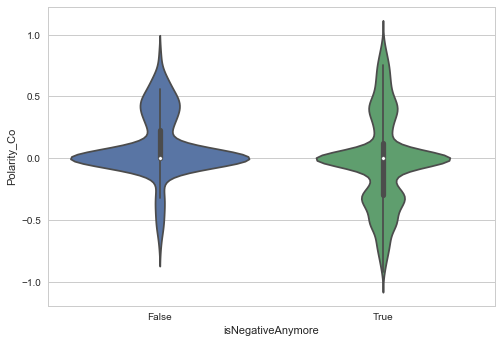

In [18]:
sns.violinplot(x="isNegativeAnymore", y="Polarity_Co", data=data)
plt.show()

In [19]:
T_p = data[data['isNegativeAnymore'] == True]['Polarity']
F_p = data[data['isNegativeAnymore'] == False]['Polarity']
stats.ttest_ind(T_p, F_p)

Ttest_indResult(statistic=0.94540836554265961, pvalue=0.34448439859372826)

In [22]:
np.mean(F_p),np.mean(T_p)

(0.05755788110698825, 0.06974503783009321)

In [20]:
T_pC = data[data['isNegativeAnymore'] == True]['Polarity_Co']
F_pC = data[data['isNegativeAnymore'] == False]['Polarity_Co']
stats.ttest_ind(T_pC, F_pC)

Ttest_indResult(statistic=-6.5056195409503115, pvalue=8.2935655697119585e-11)

In [23]:
np.mean(F_pC),np.mean(T_pC)

(0.09544923469387753, -0.026768934490923414)

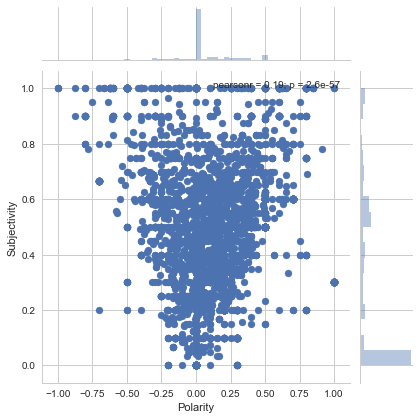

In [21]:
sns.jointplot(x="Polarity", y="Subjectivity", data=data)
plt.show()

## Draft

In [38]:
# Add a series 'isQ'
a = df.Sentence
df['isQ'] = a.str.contains('\?')
df

Sentence  \
0                                                                                                                                                                                                                                                                  why don't guys pursue women anymore?\n   
1                                                                                                                                                                                                                                                when did you find out that you were not young anymore?\n   
2                                                                                                                                                                                                                                               my son told me he doesn't want to go to church anymore.\n   
3                                                                                                                                                                                                                                                        i feel like i can't handle the stress anymore.\n   
4                                                                                                                                                                                                                                      should i drop out if i feel like i can't survive at iit anymore?\n   
5                                                                                                                                                                                                                                                                           i never read books anymore.\n   
6                                                                                                                                                                                                                                                what could you do as a kid that kids can't do anymore?\n   
7                                                                                                                                                                                                                                                                 is indian media not credible anymore?\n   
8                                                                                                                                                                         i sent my 12 year old son to school in a dress to combat gender stereotypes, and now he doesn't want to go to school anymore.\n   
9                                                                                                                                                                                                                                                  how do i tell my wife that i don't love her anymore?\n   
10                                                                                                                                                                                                                                                                        i don't want to live anymore.\n   
11                                                                                                                                                                                                                                         i don't eat anymore, i don't sleep anymore, and i'm shaking.\n   
12                                                                                                                                                                                                                                                                      why am i not as hungry anymore?\n   
13                                                                         

In [39]:
# Add a series 'isNegative'
df['isNegative'] = a.str.contains('not|Not|No|no|n\'t|nt|never|Never')
df

Sentence  \
0                                                                                                                                                                                                                                                                  why don't guys pursue women anymore?\n   
1                                                                                                                                                                                                                                                when did you find out that you were not young anymore?\n   
2                                                                                                                                                                                                                                               my son told me he doesn't want to go to church anymore.\n   
3                                                                                                                                                                                                                                                        i feel like i can't handle the stress anymore.\n   
4                                                                                                                                                                                                                                      should i drop out if i feel like i can't survive at iit anymore?\n   
5                                                                                                                                                                                                                                                                           i never read books anymore.\n   
6                                                                                                                                                                                                                                                what could you do as a kid that kids can't do anymore?\n   
7                                                                                                                                                                                                                                                                 is indian media not credible anymore?\n   
8                                                                                                                                                                         i sent my 12 year old son to school in a dress to combat gender stereotypes, and now he doesn't want to go to school anymore.\n   
9                                                                                                                                                                                                                                                  how do i tell my wife that i don't love her anymore?\n   
10                                                                                                                                                                                                                                                                        i don't want to live anymore.\n   
11                                                                                                                                                                                                                                         i don't eat anymore, i don't sleep anymore, and i'm shaking.\n   
12                                                                                                                                                                                                                                                                      why am i not as hungry anymore?\n   
13                                                                         

In [249]:
df['Test'] = df.apply(lambda x: True if x[1]+x[2]>0 else False, axis=1)
df

Sentence  \
0                                                                                                                                                                                                                                                                    Why don't guys pursue women anymore?   
1                                                                                                                                                                                                                                                  When did you find out that you were not young anymore?   
2                                                                                                                                                                                                                                                 My son told me he doesn't want to go to church anymore.   
3                                                                                                                                                                                                                                                          I feel like I can't handle the stress anymore.   
4                                                                                                                                                                                                                                        Should I drop out if I feel like I can't survive at IIT anymore?   
5                                                                                                                                                                                                                                                                             I never read books anymore.   
6                                                                                                                                                                                                                                                  What could you do as a kid that kids can't do anymore?   
7                                                                                                                                                                                                                                                                   Is Indian media not credible anymore?   
8                                                                                                                                                                           I sent my 12 year old son to school in a dress to combat gender stereotypes, and now he doesn't want to go to school anymore.   
9                                                                                                                                                                                                                                                    How do I tell my wife that I don't love her anymore?   
10                                                                                                                                                                                                                                                                          I don't want to live anymore.   
11                                                                                                                                                                                                                                           I don't eat anymore, I don't sleep anymore, and I'm shaking.   
12                                                                                                                                                                                                                                                                        Why am I not as hungry anymore?   
13                                                                         

In [201]:
from textblob import TextBlob

In [270]:
text = df.Sentence[40]
print(text)
blob = TextBlob(text)
blob.sentences[0].sentiment

I feel dirty, and I cant look at them the same way anymore without feeling sick.


Sentiment(polarity=-0.4380952380952381, subjectivity=0.594047619047619)

In [277]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
text = df.Sentence[40]
ss = sid.polarity_scores(text)
ss['compound']

-0.1451

In [12]:
qsents = []
sent_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')  
for q in qtexts:
    sent=sent_tokenizer.tokenize(q)
    for s in sent:
        if 'anymore' in s:
            qsents.append(s)
print(len(qsents),(qsents))

4778 ["Why don't guys pursue women anymore?", 'When did you find out that you were not young anymore?', "My son told me he doesn't want to go to church anymore.", "I feel like I can't handle the stress anymore.", "Should I drop out if I feel like I can't survive at IIT anymore?", 'I never read books anymore.', "What could you do as a kid that kids can't do anymore?", 'Is Indian media not credible anymore?', "I sent my 12 year old son to school in a dress to combat gender stereotypes, and now he doesn't want to go to school anymore.", "How do I tell my wife that I don't love her anymore?", "I don't want to live anymore.", "I don't eat anymore, I don't sleep anymore, and I'm shaking.", 'Why am I not as hungry anymore?', 'Heres one of the MOST common mistakes people make with food and why they dont ever feel hungry anymore.If I were a betting man Im willing to bet you went on a diet as so...', "What are the signs your partner doesn't love you anymore?", 'If your parter didnt love you anym

In [17]:
P_anymore = []
condition1 = lambda t: 'not' not in t 
P_anymore = list(filter(condition1, sentences))
condition2 = lambda t: 'Not' not in t 
P_anymore = list(filter(condition2, P_anymore))
condition3 = lambda t: 'n\'t' not in t 
P_anymore = list(filter(condition3, P_anymore))
condition4 = lambda t: 'nt' not in t 
P_anymore = list(filter(condition4, P_anymore))
condition5 = lambda t: 'no' not in t 
P_anymore = list(filter(condition5, P_anymore))
condition6 = lambda t: 'No' not in t 
P_anymore = list(filter(condition6, P_anymore))
condition7 = lambda t: 'never' not in t 
P_anymore = list(filter(condition7, P_anymore))
condition8 = lambda t: 'Never' not in t 
p_anymore = list(filter(condition8, P_anymore))
print(len(P_anymore),P_anymore)

85 ['First of all, I am clarifying my concept of need Taiwan anymore.\n', 'Does US need Alaska anymore?\n', 'Does UK need Gibraltar anymore?\n', 'Does Japan need Hokkaido anymore?\n', 'Does Russia need Kaliningrad anymore?\n', 'Does Israel need Jerusalem anymore?\n', 'Original Question: Is there anything good about America anymore?\n', 'Do we need Abracadabra anymore?\n', 'Splitting infinitives (does anyone even care about this one anymore?\n', 'As you wrote anymore, so I assume you could see the statuses previously.\n', 'How can we believe any polls anymore?\n', 'Original Question: How can we believe any polls anymore?\n', 'Q: Which is right, any more or anymore?\n', 'Instead, anymore (or any more) is used to qualify the verb say.\n', 'So, why bother with the single word anymore?\n', 'Which is right, any more or anymore?\n', 'The question was - Which is right, any more or anymore?\n', 'Part of the issue is that any more and anymore can both be correct - its how you use the.\n', 'But, 

In [13]:
# Answers with 'anymore' in result page
html=driver.page_source
soup1=BeautifulSoup(html,'lxml')
ans = soup1.select('p.qtext_para')
#print(ans)
texts = []
for a in ans:
    text = a.get_text()
    if 'anymore' in text:
        #print(text)
        texts.append(text) #texts.append(text.encode('ascii', 'ignore'))
print(len(texts),texts)

585 ['Why don\'t men chase women anymore when they\'re only told "no" once?', '“I don’t want to live anymore.”', 'Not a secret anymore!', 'Non-entrepreneurs mistakenly believe in something called “job security”. That does not exist anymore. 50 years ago it used to be the case where the same person could start ...', "Are US citizens aware that many Europeans don't consider the US as a real democracy anymore?", "“We’ve just decided she won't have sex anymore.”", 'They don’t. They don’t wash their clothes. They wear them until they can’t stand them anymore and then they throw them away. It is less expensive to do that than to consume...', "Israel doesn't stamp passports anymore.\xa0…\xa0You're issued a ticket that you carry with your passport until you depart.", 'It’s not a secret anymore.', 'After a couple of weeks, the talk dies down and nobody really cares anymore…', 'Supercomputers aren’t used to run chess programs anymore. In the 80s and 90s, some very strong supercomputers, such as 

In [14]:
# Saving list to .txt file
fileObject = open('Result_text.txt', 'w', encoding='ascii', errors='ignore')
for text in texts: 
    #print(text,file = fileObject)
    fileObject.write(text)  
    fileObject.write('\n')  
fileObject.close()  

In [24]:
# hrefs of answers with 'anymore'
ans = soup1.find_all('a', target="_blank")
hrefs = []
for a in ans:
    href = a.get('href')
    if '#ans' in href:
        hrefs.append(href)
print(len(hrefs),hrefs)

2670 ['/When-did-you-find-out-that-you-were-not-young-anymore#ans23151516', '/Why-dont-men-chase-women-anymore-when-theyre-only-told-no-once#ans32252251', '/What-is-the-most-heartbreaking-thing-you-ve-had-to-tell-somebody#ans73485118', '/Are-you-secretly-super-attractive#ans75277515', '/How-do-entrepreneurs-think-as-compared-to-non-entrepreneurs#ans51465590', '/Are-US-citizens-aware-that-many-Europeans-dont-consider-the-US-as-a-real-democracy-anymore#ans59073260', '/Doctors-Medics-What-is-the-dumbest-thing-youve-ever-heard-a-patient-say-or-ask#ans67355228', '/What-are-the-signs-your-partner-doesnt-love-you-anymore#ans35891004', '/How-do-astronauts-dry-their-washed-clothes-in-space#ans36048219', '/Will-Indian-toilets-ever-switch-to-toilet-papers-Westerners-believe-that-tissues-are-hygienic-and-Indians-think-otherwise-Will-it-eventually-change#ans17344428', '/Should-we-kick-Tamil-Nadu-out-of-India#ans61350714', '/Are-there-countries-that-you-cant-enter-if-youve-visited-Israel-before#ans1

In [25]:
# Saving list to .txt file
fileObject = open('hrefs.txt', 'w', encoding='ascii', errors='ignore')
for href in hrefs: 
    fileObject.write(href)  
    fileObject.write('\n')  
fileObject.close()  

In [27]:
# urls of answers
ans_urls=[]
for href in hrefs:
    ans_urls.append('https://www.quora.com'+ href)
print(len(ans_urls), ans_urls)

2670 ['https://www.quora.com/When-did-you-find-out-that-you-were-not-young-anymore#ans23151516\n', 'https://www.quora.com/Why-dont-men-chase-women-anymore-when-theyre-only-told-no-once#ans32252251\n', 'https://www.quora.com/What-is-the-most-heartbreaking-thing-you-ve-had-to-tell-somebody#ans73485118\n', 'https://www.quora.com/Are-you-secretly-super-attractive#ans75277515\n', 'https://www.quora.com/How-do-entrepreneurs-think-as-compared-to-non-entrepreneurs#ans51465590\n', 'https://www.quora.com/Are-US-citizens-aware-that-many-Europeans-dont-consider-the-US-as-a-real-democracy-anymore#ans59073260\n', 'https://www.quora.com/Doctors-Medics-What-is-the-dumbest-thing-youve-ever-heard-a-patient-say-or-ask#ans67355228\n', 'https://www.quora.com/What-are-the-signs-your-partner-doesnt-love-you-anymore#ans35891004\n', 'https://www.quora.com/How-do-astronauts-dry-their-washed-clothes-in-space#ans36048219\n', 'https://www.quora.com/Will-Indian-toilets-ever-switch-to-toilet-papers-Westerners-believ

In [28]:
# Saving list to .txt file
fileObject = open('ans_urls.txt', 'w', encoding='ascii', errors='ignore')
for url in ans_urls: 
    fileObject.write(url)  
    #fileObject.write('\n')  
fileObject.close()  

In [79]:
# Reloading .txt file
with open('Sents.txt', 'r') as f:  
    sentences = f.readlines()
print(len(sentences),sentences)

1644 ['Not sneaking anymore to the museum, we would spend after-school Fridays drinking beer in a park, worrying about final exams.\n', 'When you hear more proper terms of address, you know you have crossed over some invisible line and youre not a child anymore.\n', 'When did you find out that you were not young anymore?\n', 'Why don\'t men chase women anymore when they\'re only told "no" once?\n', 'But nowadays, no one wants to do his/her own thing anymore.\n', 'It is not that I didnt accept that you dont want me anymore in your life, but that I still love and care about you even though you cant give me anything in return.\n', 'Or because the project took so long to finish that they are not interested anymore.\n', "The trick is to know before hand if your partner has the same philosophy, or if they side with the spirit of the age and decide that it's a good thing to give up when it's not fun anymore.\n", 'They wear them until they cant stand them anymore and then they throw them away.

In [49]:
# Answers with 'anymore' in result page
html=driver.page_source
soup1=BeautifulSoup(html,'lxml')
ans = soup1.select('p.qtext_para')
#print(ans)
texts = []
for a in ans:
    text = a.get_text()
    if 'anymore' in text:
        #print(text)
        texts.append(text) #texts.append(text.encode('ascii', 'ignore'))
print(len(texts),texts)

456 ['Why don\'t men chase women anymore when they\'re only told "no" once?', '“I don’t want to live anymore.”', 'Not a secret anymore!', "Are US citizens aware that many Europeans don't consider the US as a real democracy anymore?", 'Non-entrepreneurs mistakenly believe in something called “job security”. That does not exist anymore. 50 years ago it used to be the case where the same person could start ...', "“We’ve just decided she won't have sex anymore.”", 'They don’t. They don’t wash their clothes. They wear them until they can’t stand them anymore and then they throw them away. It is less expensive to do that than to consume...', "Israel doesn't stamp passports anymore.\xa0…\xa0You're issued a ticket that you carry with your passport until you depart.", 'It’s not a secret anymore.', 'After a couple of weeks, the talk dies down and nobody really cares anymore…', 'Supercomputers aren’t used to run chess programs anymore. In the 80s and 90s, some very strong supercomputers, such as 

In [50]:
# hrefs of answers with 'anymore'
ans = soup1.find_all('a', target="_blank")
hrefs = []
for a in ans:
    href = a.get('href')
    if '#ans' in href:
        hrefs.append(href)
print(len(hrefs),hrefs)

2100 ['/When-did-you-find-out-that-you-were-not-young-anymore#ans23151516', '/Why-dont-men-chase-women-anymore-when-theyre-only-told-no-once#ans32252251', '/What-is-the-most-heartbreaking-thing-you-ve-had-to-tell-somebody#ans73485118', '/Are-you-secretly-super-attractive#ans75277515', '/Are-US-citizens-aware-that-many-Europeans-dont-consider-the-US-as-a-real-democracy-anymore#ans59073260', '/How-do-entrepreneurs-think-as-compared-to-non-entrepreneurs#ans51465590', '/Doctors-Medics-What-is-the-dumbest-thing-youve-ever-heard-a-patient-say-or-ask#ans67355228', '/What-are-the-signs-your-partner-doesnt-love-you-anymore#ans35891004', '/How-do-astronauts-dry-their-washed-clothes-in-space#ans36048219', '/Will-Indian-toilets-ever-switch-to-toilet-papers-Westerners-believe-that-tissues-are-hygienic-and-Indians-think-otherwise-Will-it-eventually-change#ans17344428', '/Should-we-kick-Tamil-Nadu-out-of-India#ans61350714', '/Are-there-countries-that-you-cant-enter-if-youve-visited-Israel-before#ans1

In [51]:
# urls of answers
ans_urls=[]
for href in hrefs:
    ans_urls.append('https://www.quora.com'+ href)
print(len(ans_urls), ans_urls)

2100 ['https://www.quora.com/When-did-you-find-out-that-you-were-not-young-anymore#ans23151516', 'https://www.quora.com/Why-dont-men-chase-women-anymore-when-theyre-only-told-no-once#ans32252251', 'https://www.quora.com/What-is-the-most-heartbreaking-thing-you-ve-had-to-tell-somebody#ans73485118', 'https://www.quora.com/Are-you-secretly-super-attractive#ans75277515', 'https://www.quora.com/Are-US-citizens-aware-that-many-Europeans-dont-consider-the-US-as-a-real-democracy-anymore#ans59073260', 'https://www.quora.com/How-do-entrepreneurs-think-as-compared-to-non-entrepreneurs#ans51465590', 'https://www.quora.com/Doctors-Medics-What-is-the-dumbest-thing-youve-ever-heard-a-patient-say-or-ask#ans67355228', 'https://www.quora.com/What-are-the-signs-your-partner-doesnt-love-you-anymore#ans35891004', 'https://www.quora.com/How-do-astronauts-dry-their-washed-clothes-in-space#ans36048219', 'https://www.quora.com/Will-Indian-toilets-ever-switch-to-toilet-papers-Westerners-believe-that-tissues-are

In [32]:
import requests

In [34]:
url = ans_urls[0]
res = requests.get(url,headers = {'User-Agent': 'My-requests-agent/0.1'})
if res.status_code == 200:
    soup3 = BeautifulSoup(res.content,'lxml')  
#print(soup3)
pr = soup3.select('p.ui_qtext_para')
prs = []
for p in pr:
    p = p.get_text()
    if 'anymore' in p:
        prs.append(p)
print(len(prs),prs)

3 ['Bosmat high school was the place to be if you were a child of “Russian” immigrants. It had technical paths, such as electronics and computers, and it was historically linked with Technion, Israel’s most prestigious technological university. These magic keywords were enough to light up our parents’ soviet-informed imagination. So of course both us were there. The school was located in a building adjacent to the Technoda. Not sneaking anymore to the museum, we would spend after-school Fridays drinking beer in a park, worrying about final exams.', "This is a life story I enjoy sharing. I'm 52 and I really don’t feel any older than I felt in my twenties. Things however are different. Sometime along the road of life, people started calling me ma’am. Apparently, we don’t use that term of address to children. We don’t call young adult girls ma’am. So, if are in your early twenties but you could pass for a high school girl, noone addresses you as ma’am. Then one day you start hearing ma’am

In [30]:
url = ans_urls[0]
cookie=driver.get_cookies()
time.sleep(3)
driver.get(url)
time.sleep(5)
html2=driver.page_source
soup2=BeautifulSoup(html2,'lxml')
para = soup2.select('p.ui_qtext_para')
paras = []
for p in para:
    p = p.get_text()
    if 'anymore' in p:
        paras.append(p)
print(len(paras),paras)

3 ['Bosmat high school was the place to be if you were a child of “Russian” immigrants. It had technical paths, such as electronics and computers, and it was historically linked with Technion, Israel’s most prestigious technological university. These magic keywords were enough to light up our parents’ soviet-informed imagination. So of course both us were there. The school was located in a building adjacent to the Technoda. Not sneaking anymore to the museum, we would spend after-school Fridays drinking beer in a park, worrying about final exams.', "This is a life story I enjoy sharing. I'm 52 and I really don’t feel any older than I felt in my twenties. Things however are different. Sometime along the road of life, people started calling me ma’am. Apparently, we don’t use that term of address to children. We don’t call young adult girls ma’am. So, if are in your early twenties but you could pass for a high school girl, noone addresses you as ma’am. Then one day you start hearing ma’am

In [31]:
sent_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')  
sents=sent_tokenizer.tokenize(paras[0])
print(len(sents),(sents))

6 ['Bosmat high school was the place to be if you were a child of “Russian” immigrants.', 'It had technical paths, such as electronics and computers, and it was historically linked with Technion, Israel’s most prestigious technological university.', 'These magic keywords were enough to light up our parents’ soviet-informed imagination.', 'So of course both us were there.', 'The school was located in a building adjacent to the Technoda.', 'Not sneaking anymore to the museum, we would spend after-school Fridays drinking beer in a park, worrying about final exams.']


In [91]:
ts = []
for a in ans:
    text = a.get_text()
    text = text.replace(u'\xa0', u' ')
    text = text.replace(u'\xb4', u' ')
    text = text.replace(u'\ud55c', u' ')
    text = text.replace(u'\uc131', u' ')
    
    if 'anymore' in text:
        ts.append(text)
print(len(ts),ts)

459 ['Why don\'t men chase women anymore when they\'re only told "no" once?', '“I don’t want to live anymore.”', 'Not a secret anymore!', 'Non-entrepreneurs mistakenly believe in something called “job security”. That does not exist anymore. 50 years ago it used to be the case where the same person could start ...', "Are US citizens aware that many Europeans don't consider the US as a real democracy anymore?", "“We’ve just decided she won't have sex anymore.”", 'They don’t. They don’t wash their clothes. They wear them until they can’t stand them anymore and then they throw them away. It is less expensive to do that than to consume...', "Israel doesn't stamp passports anymore. … You're issued a ticket that you carry with your passport until you depart.", 'It’s not a secret anymore.', 'After a couple of weeks, the talk dies down and nobody really cares anymore…', 'Supercomputers aren’t used to run chess programs anymore. In the 80s and 90s, some very strong supercomputers, such as Deep T

In [83]:
fileObject = open('Result_text.txt', 'w')
for text in ts:  
    fileObject.write(text)  
    fileObject.write('\n')  
fileObject.close()  

In [158]:
nots = []
for l in data:
    if "n\'t" in l:
        nots.append(l)
print(len(nots))

128


In [61]:
cookie=driver.get_cookies()
time.sleep(3)
driver.get('https://www.quora.com/search?q=anymore')
time.sleep(5)

In [64]:
html=driver.page_source
soup1=BeautifulSoup(html,'lxml')
#print(soup1)
questions=soup1.select('a.question_link')
#print(questions)
questions_alls=[]
questions_hrefs=[]
for question in questions:
    questions_alls.append(question.get_text())
    questions_hrefs.append('https://www.quora.com/'+question.get('href'))
#print(questions_alls)
#print(questions_hrefs)

In [7]:
url=questions_hrefs[0]
url

'https://www.quora.com//Why-dont-guys-pursue-women-anymore'

In [ ]:
for url in questions_hrefs:
    cookie=driver.get_cookies()
    time.sleep(3)
    driver.get(url)
    time.sleep(5)

In [38]:
link = driver.find_element_by_link_text('(more)')
link.click()

In [35]:
html=driver.page_source
soup1=BeautifulSoup(html,'lxml')
#print(soup1)
answers=soup1.select('span.search_result_snippet')
print (answers)

[<span class="search_result_snippet"><span class="rendered_qtext"><p class="qtext_para">As some of the other commentators below indicated, it’s just much easier to do so online. For several reasons:</p><ol><li><b>Getting rejected in public feels absolutely terrible. </b>I don’t ...</li></ol></span></span>, <span class="search_result_snippet"><span class="rendered_qtext"><p class="qtext_para">I know <i>exactly</i> when.</p><p class="qtext_para">My career took off quickly after film school and a couple of entry level positions. I was blessed to find myself in the company of a wise, respected, sh...</p></span></span>, <span class="search_result_snippet"><span class="rendered_qtext"><p class="qtext_para">Punishing him is not going to solve your problem, and it’s not going to serve the relationship you have with your son, either. Not long term. You’ll just be hastening what ...</p></span></span>, <span class="search_result_snippet"><span class="rendered_qtext">I am not sure of this is a ser